# Subplots

#### 1 - Função subplot

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

plt.subplot?

#### 2 - Primeiro subplot

<IPython.core.display.Javascript object>


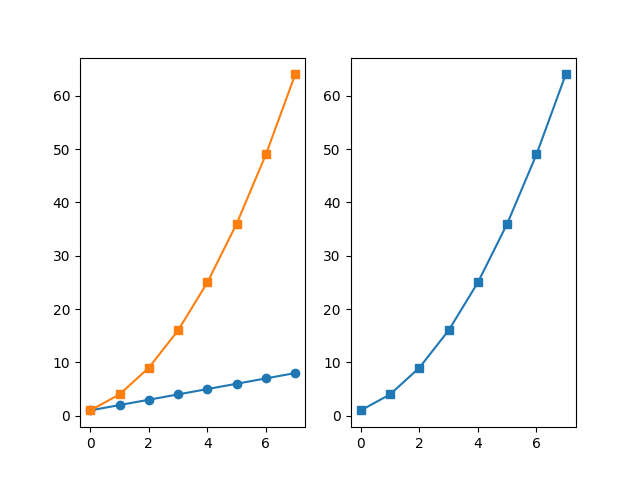

In [2]:
plt.figure()
# subplot com 1 linha, 2 colunas e o "eixos" atual são os eixos da 1ª sub-parcela
plt.subplot(1,2,1)

linear = np.array([1,2,3,4,5,6,7,8])

plt.plot(linear,'-o')

#### 3 - Segundo subplot

In [3]:
exponential = linear**2
plt.subplot(1,2,2)

plt.plot(exponential, '-s')
# subplot com 1 linha, 2 colunas e o "eixos" atual são os eixos da 2ª sub-parcela


#### 4 - Trocando de "eixos"

In [4]:
# plot exponential na 1ª sub-parcela
plt.subplot(1,2,1)
plt.plot(exponential, "-s")

#### 5 - Compartilhamento de eixo

<IPython.core.display.Javascript object>


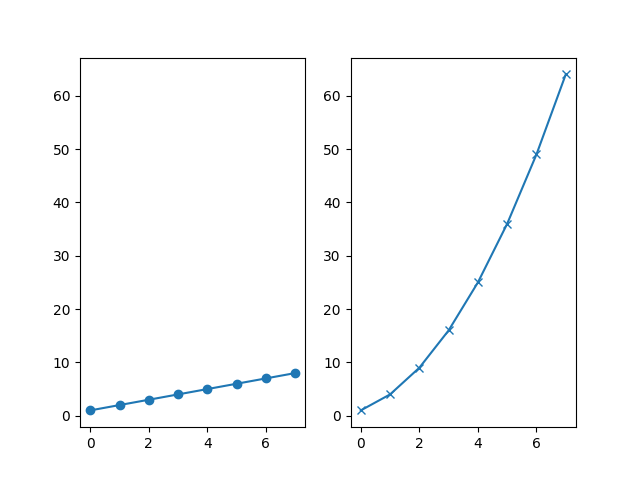

In [5]:
plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear, '-o')
# sharey=ax1 garante que os subplots compartilham o mesmo (tamanho) eixo y
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(exponential, '-x')

#### 6 - Grid de subplots (função subplotsssss)

<IPython.core.display.Javascript object>


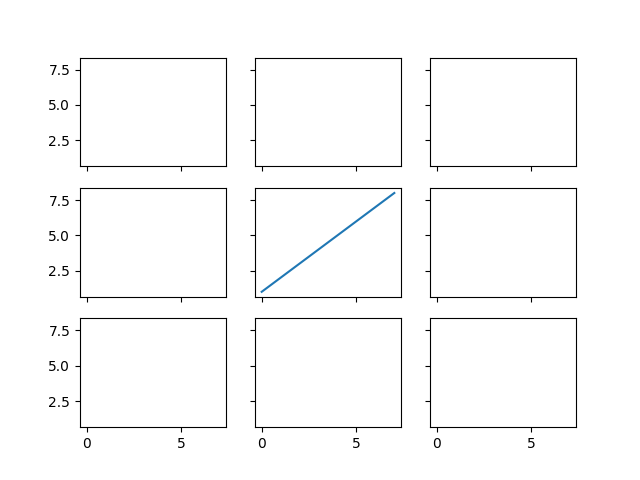

In [6]:
# 3x3 grid de subplots
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, sharex=True, sharey=True)
# plotar os dados lineares no 5º subplot
ax5.plot(linear, '-')


# Histogramas

#### 7 - Histograma através de amostragem

<IPython.core.display.Javascript object>


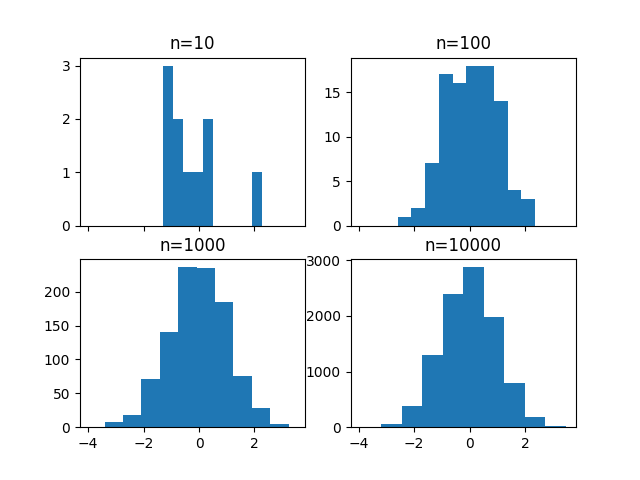

In [7]:
# criar 2 x 2 de objetos de eixos
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2, sharex=True)
axs = [ax1,ax2,ax3,ax4]
# n = 10, 100, 1000, and 10000 amostrar da distribuição normal
for n in range(0, len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size = sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))


#### 8 - O número de Bins

<IPython.core.display.Javascript object>


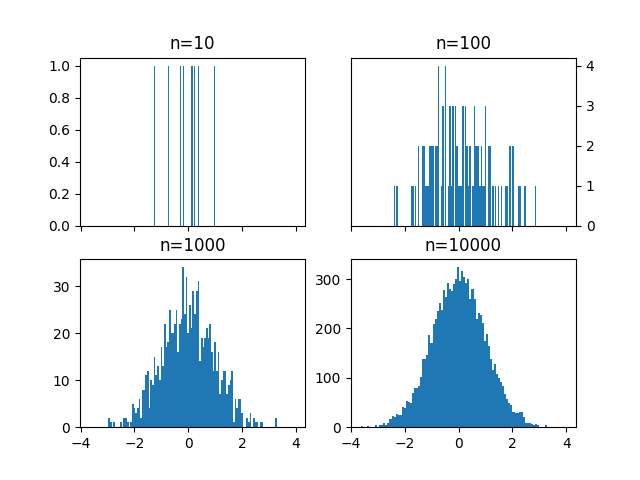

In [8]:
# criar 2 x 2 de objetos de eixos
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2, sharex=True)
axs = [ax1,ax2,ax3,ax4]
# n = 10, 100, 1000, and 10000 amostrar da distribuição normal
for n in range(0, len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size = sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

#### 9 - Scatter plot para usar com GridSpec

<IPython.core.display.Javascript object>


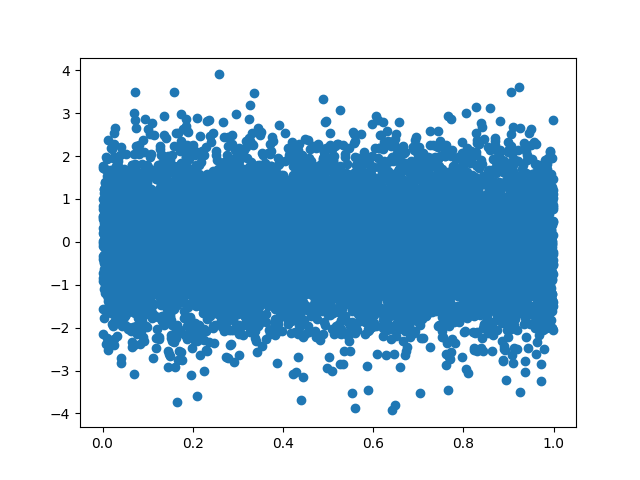

In [9]:
plt.figure()
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.scatter(X,Y)

#### 10 - Exemplo com o GridSpec

<IPython.core.display.Javascript object>


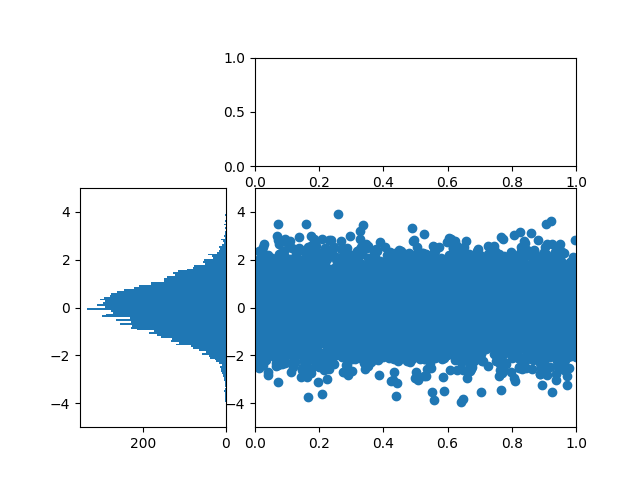

In [10]:
# gridspec permite particionar a figura em subplots,
# de formas mais espertas

import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

#### 11 - Adicionando dados aos subplots

In [11]:
lower_right.scatter(X,Y)
top_histogram.hist(X, bins=100)
side_histogram.hist(Y, bins=100, orientation='horizontal');

#### 12 - Funções clear(), hist() e invert_xaxis()

In [12]:
# limpar os histogramas e criar histogramas normalizados
top_histogram.clear()
# virar o eixo x do histograma lateral
side_histogram.invert_xaxis()

#### 13 -  Funções set_xlim() e set_ylim()

In [13]:
# mudar limites dos eixos
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

# Plotagem de Caixas - Box Plot

#### 14 - Criar 3 amostragens distintas

In [14]:
import pandas as pd
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})

#### 15 - Função describe() do pandas

In [15]:
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,0.000269,0.504667,1.980618
std,0.997726,0.288264,1.403966
min,-3.823549,0.000068,0.006168
25%,-0.672595,0.256254,0.945860
50%,0.001535,0.500068,1.658335
75%,0.654593,0.759523,2.668764
max,4.112338,0.999972,14.038100


#### 16 - Primeiro Boxplot

<IPython.core.display.Javascript object>


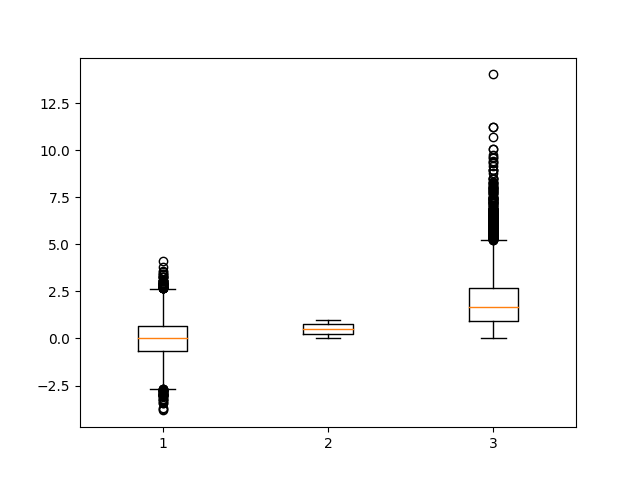

ValueError: whis must be a float or list of percentiles

In [16]:
plt.figure()
# cria um boxplot dos dados normais, atribui a saída a uma variável para suprimir a saída
plt.boxplot(df['normal'], whis='range');

#### 17 - Segundo Boxplot

In [18]:
# limpa a figura corrente
plt.clf()
# plota caixas para três tipos de distribuição
plt.boxplot([df['normal'], df['random'], df['gamma']]);

#### 18 - Histograma da distribuição gamma

<IPython.core.display.Javascript object>


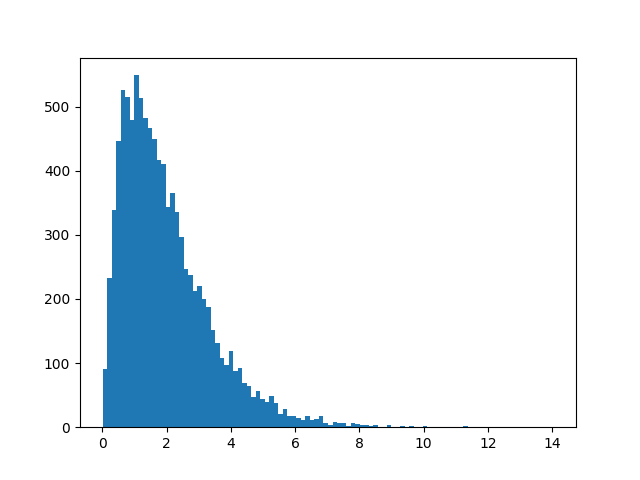

(array([ 90., 232., 339., 447., 526., 515., 479., 549., 514., 482., 467.,
        449., 417., 410., 343., 366., 336., 297., 247., 238., 213., 220.,
        200., 187., 151., 132., 108.,  97., 119.,  87.,  93.,  69.,  64.,
         47.,  56.,  44.,  40.,  48.,  38.,  20.,  29.,  17.,  18.,  15.,
         12.,  17.,  12.,  13.,  18.,   6.,   3.,   8.,   6.,   6.,   2.,
          6.,   5.,   4.,   4.,   2.,   4.,   0.,   1.,   3.,   0.,   1.,
          2.,   1.,   2.,   1.,   0.,   2.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([6.16769320e-03, 1.46487012e-01, 2.86806331e-01, 4.27125650e-01,
        5.67444968e-01, 7.07764287e-01, 8.48083606e-01, 9.88402925e-01,
        1.12872224e+00, 1.26904156e+00, 1.40936088e+00, 1.54968020e+00,
        1.68999952e+00, 1.83031884e+00, 1.97063816e+00, 2.11095748e+00,
        2.25127679e+00, 2.3915

In [19]:
plt.figure()
plt.hist(df['gamma'], bins=100)

#### 19 - Inset Plot usando toolkits

<IPython.core.display.Javascript object>


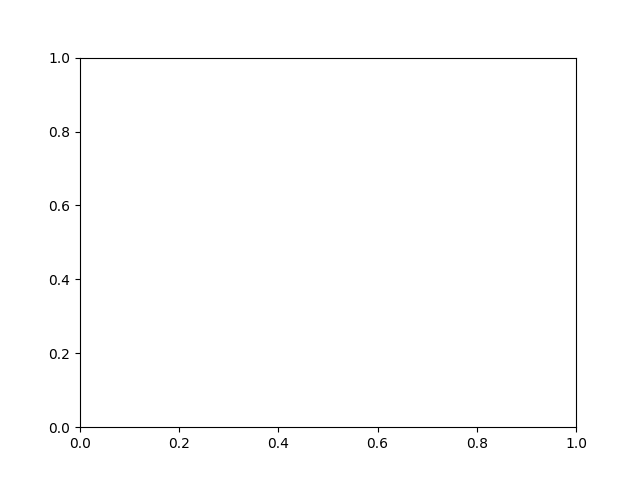

ValueError: whis must be a float or list of percentiles

In [20]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')
# eixo de sobreposição
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)

#### 20 - Troca o lado dos ticks para a figura inset

In [21]:
# marcações do eixo y para ax2 - lado direito
ax2.yaxis.tick_right()

#### 21 - Detectando outliers

<IPython.core.display.Javascript object>


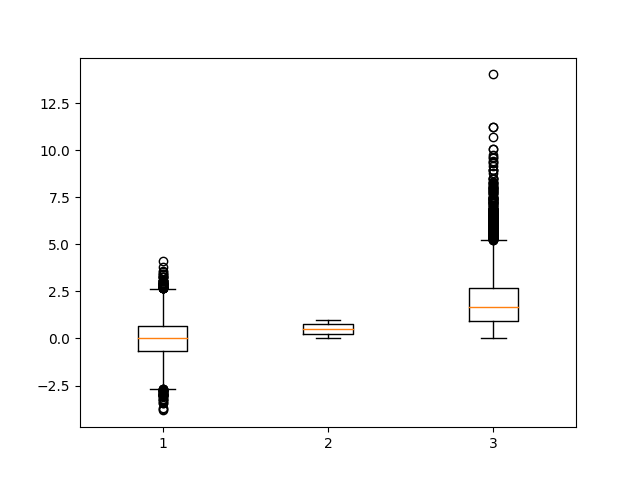

In [22]:
# se o argumento `whis` não for passado, o boxplot é padronizado para mostrar bigodes interquartis (IQR), com outliers
plt.figure()
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ] )

# Mapas de calor

#### 22 - Primeiro mapa de calor

<IPython.core.display.Javascript object>


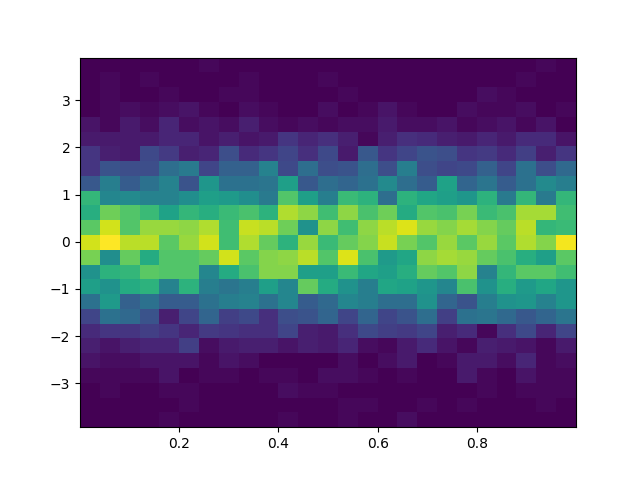

(array([[ 0.,  0.,  0.,  1.,  3.,  5.,  7., 12., 22., 33., 30., 47., 55.,
         44., 37., 39., 16.,  9.,  9.,  4.,  3.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  1.,  2.,  3.,  9., 22., 32., 30., 38., 29., 59.,
         55., 46., 27., 25., 15.,  5.,  4.,  1.,  1.,  1.,  1.,  0.],
        [ 0.,  0.,  0.,  1.,  2.,  5.,  9., 20., 18., 36., 39., 45., 53.,
         43., 43., 28., 17., 14.,  4.,  4.,  4.,  2.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  3.,  6., 11., 15., 22., 38., 44., 36., 53.,
         50., 40., 26., 22., 14., 13.,  4.,  2.,  1.,  0.,  1.,  0.],
        [ 1.,  0.,  1.,  3.,  3.,  6.,  9.,  5., 17., 26., 43., 43., 44.,
         50., 34., 26., 26., 21., 10.,  6.,  6.,  2.,  1.,  0.,  0.],
        [ 0.,  1.,  1.,  0.,  3., 11.,  6., 12., 17., 38., 43., 43., 50.,
         49., 39., 29., 15., 24.,  5.,  6.,  2.,  3.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  1.,  2., 10., 19., 22., 25., 27., 45., 55.,
         52., 37., 33., 31., 12.,  6.,  3.,  3.,  1.,  0.,  0.

In [23]:
plt.figure()

plt.hist2d(X,Y, bins=25)

#### 23 - Aumentando o número de bins no mapa de calor

<IPython.core.display.Javascript object>


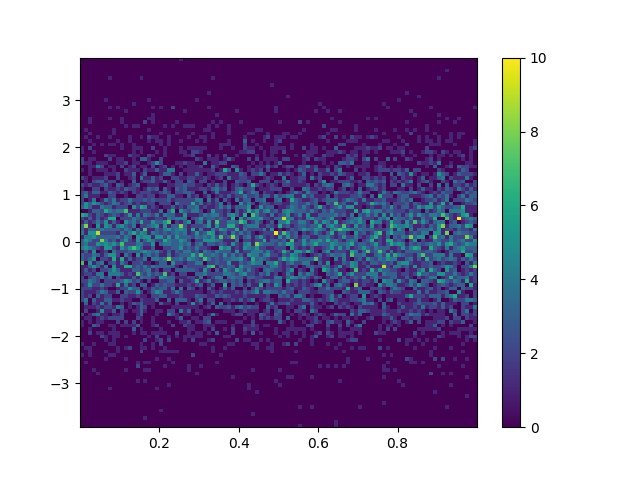

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([2.94503878e-05, 1.00265366e-02, 2.00236228e-02, 3.00207089e-02,
        4.00177951e-02, 5.00148813e-02, 6.00119675e-02, 7.00090537e-02,
        8.00061399e-02, 9.00032260e-02, 1.00000312e-01, 1.09997398e-01,
        1.19994485e-01, 1.29991571e-01, 1.39988657e-01, 1.49985743e-01,
        1.59982829e-01, 1.69979916e-01, 1.79977002e-01, 1.89974088e-01,
        1.99971174e-01, 2.09968260e-01, 2.19965346e-01, 2.29962433e-01,
        2.39959519e-01, 2.49956605e-01, 2.59953691e-01, 2.69950777e-01,
        2.79947864e-01, 2.89944950e-01, 2.99942036e-01, 3.09939122e-01,
        3.19936208e-01, 3.29933294e-01, 3.39930381e-01, 3.49927467e-01,
        3.59924553e-01, 3.69921639e-01, 3.79918725e-01, 3.89915812e-01,
        3.99912898e-01, 4.09909

In [24]:
plt.figure()

plt.hist2d(X,Y, bins=100)

#### 24 - Adicionando legenda colorbar()

In [25]:
# adiciona barra de cores
plt.colorbar()

# Animações

#### 25 - Preparação da animação

In [26]:
import matplotlib.animation as animation

n = 100
x = np.random.randn(n)

#### 26 - Função para animar

In [27]:
# cria a função que fará a plotagem, onde "curr" é o quadro atual
def update(curr):
    # se a animação está no último quadro, pare a animação
    if curr == n: 
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])

#### 27 - Inicia a animação

<IPython.core.display.Javascript object>


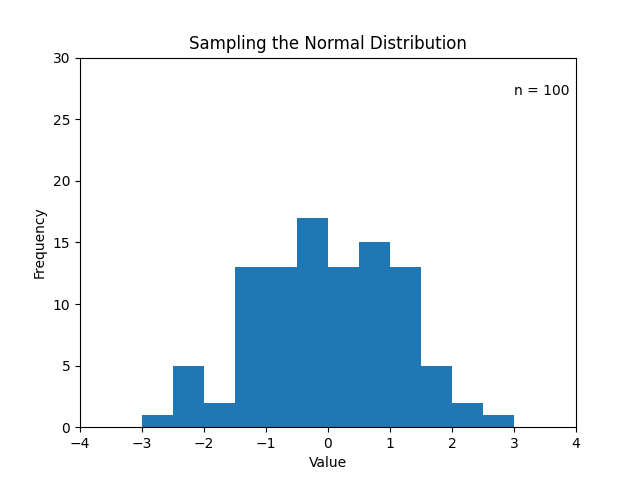

In [28]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)